In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.io as pio
import plotly.express as ex
import plotly.graph_objs  as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Banking/banking.csv")
df.sample(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
39120,26,blue-collar,married,primary,no,595,yes,yes,cellular,18,may,222,3,-1,0,unknown,no
39100,29,admin.,single,tertiary,no,1501,yes,no,cellular,18,may,316,1,-1,0,unknown,no
23759,30,management,married,tertiary,no,1239,no,no,cellular,28,aug,125,5,-1,0,unknown,no
25702,46,blue-collar,married,secondary,no,9347,yes,no,cellular,19,nov,138,1,117,1,other,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.shape

(45211, 17)

In [5]:
df['education']=df['education'].str.lower()
df['job']=df['job'].str.lower()
df['marital']=df['marital'].str.lower()
print ('The max of age is ',df['age'].max())
print('The min age is' , df['age'].min())

The max of age is  95
The min age is 18


In [6]:
print('the max duration ', df['duration'].max())
print('the min duration ', df['duration'].min())

the max duration  4918
the min duration  0


In [7]:
def balance_category(df):
    
    if df['balance']<= 5000:
        return 'low balance'
    
    elif df['balance']<= 15000:
        return 'average balance'
    
    else:
        return 'high balance'

df['balance_category'] =df.apply(balance_category, axis=1)


df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balance_category
23203,49,blue-collar,married,secondary,no,-417,no,no,cellular,27,aug,13,20,-1,0,unknown,no,low balance
28152,36,services,divorced,secondary,no,532,yes,no,cellular,29,jan,391,1,241,1,failure,no,low balance
5331,32,technician,single,tertiary,no,390,yes,no,unknown,23,may,85,1,-1,0,unknown,no,low balance
34424,34,management,single,tertiary,no,26575,no,no,cellular,5,may,245,6,168,1,failure,no,high balance
39754,57,management,married,tertiary,no,473,no,no,cellular,1,jun,295,1,-1,0,unknown,yes,low balance


In [8]:
def purpose(df):
    
    if df['y']=='no':
        return "can not get a credit"
    else:  
        return "can get a credit"
    
df['purpose'] =df.apply(purpose, axis=1)


df.sample(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balance_category,purpose
23029,31,technician,single,secondary,no,798,no,no,telephone,26,aug,66,10,-1,0,unknown,no,low balance,can not get a credit
9825,43,management,single,tertiary,no,1046,no,no,unknown,9,jun,901,1,-1,0,unknown,yes,low balance,can get a credit
40421,42,entrepreneur,married,secondary,no,2959,yes,no,telephone,2,jul,711,1,342,1,failure,yes,low balance,can get a credit
24803,32,admin.,single,tertiary,no,170,no,no,cellular,18,nov,74,1,-1,0,unknown,no,low balance,can not get a credit


In [9]:
def poutcome(df):
    if df['poutcome']=='unknown':
        return "Under consideration"
    elif df['poutcome']=='failure':
        return 'failure'
    elif df['poutcome']=='other':
        return 'other'
    else:
        return 'success'
    
    
df['poutcome']=df.apply(poutcome,axis=1)

df.sample(6)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balance_category,purpose
26601,53,technician,divorced,tertiary,no,6503,yes,no,cellular,20,nov,143,1,-1,0,Under consideration,no,average balance,can not get a credit
43798,29,student,single,tertiary,no,459,no,no,unknown,26,may,376,1,-1,0,Under consideration,no,low balance,can not get a credit
24181,35,admin.,single,secondary,no,943,no,no,telephone,14,nov,24,1,-1,0,Under consideration,no,low balance,can not get a credit
40831,45,admin.,married,secondary,no,1435,yes,no,cellular,11,aug,201,1,103,1,failure,no,low balance,can not get a credit
30330,57,unemployed,married,secondary,no,7357,no,no,cellular,5,feb,604,1,-1,0,Under consideration,no,average balance,can not get a credit
27451,46,admin.,divorced,secondary,no,3163,no,no,cellular,21,nov,128,3,-1,0,Under consideration,no,low balance,can not get a credit


In [10]:
df.drop(columns=['default','pdays','previous','y'],inplace=True)
df.sample(5)

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,poutcome,balance_category,purpose
33392,37,services,married,secondary,1498,yes,no,cellular,20,apr,107,1,Under consideration,low balance,can not get a credit
274,37,admin.,married,secondary,190,yes,no,unknown,5,may,92,2,Under consideration,low balance,can not get a credit
3951,32,blue-collar,married,primary,158,yes,no,unknown,16,may,84,4,Under consideration,low balance,can not get a credit
41372,21,student,single,secondary,557,no,no,cellular,31,aug,197,2,Under consideration,low balance,can not get a credit
26209,33,technician,single,secondary,247,yes,no,cellular,20,nov,428,1,Under consideration,low balance,can not get a credit


In [11]:
df['balance']=df['balance'].astype('int')
df['duration']=df['duration'].astype('int')
cat_cols=df.select_dtypes(include='object')
num_cols=df.select_dtypes(exclude='object')
cat_cols.describe()

,job,marital,education,housing,loan,contact,month,poutcome,balance_category,purpose
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,3,12,4,3,2
top,blue-collar,married,secondary,yes,no,cellular,may,Under consideration,low balance,can not get a credit
freq,9732,27214,23202,25130,37966,29285,13766,36959,42366,39922


In [15]:
num_cols.describe()

,age,balance,day,duration,campaign
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841
std,10.618762,3044.765829,8.322476,257.527812,3.098021
min,18.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


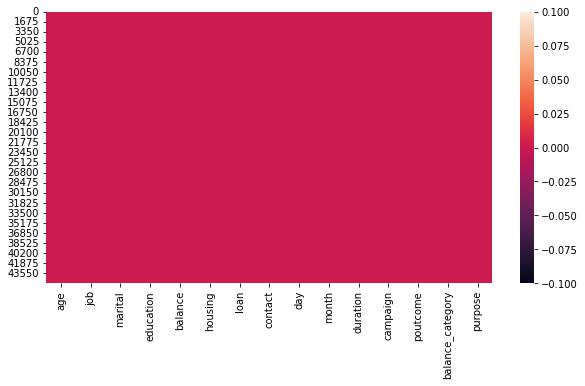

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull());

In [17]:
target=df[df['purpose']=='can get a credit']
non_target=df[df['purpose']=='can not get a credit']
target_cols=['purpose']
cat_cols=df.nunique()[df.nunique()<10].keys().tolist()
cat_cols=[x for x in cat_cols if x not in target_cols]
num_col=[x for x in df.columns if x not in cat_cols+ target_cols]
df['job'].value_counts(normalize=True)*100

blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: job, dtype: float64

In [18]:
df['marital'].value_counts(normalize=True)*100

married     60.193316
single      28.289576
divorced    11.517109
Name: marital, dtype: float64

In [19]:
df['marital'].value_counts(normalize=True)*100

married     60.193316
single      28.289576
divorced    11.517109
Name: marital, dtype: float64

In [21]:
df["housing"].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [22]:
df['loan'].value_counts()

no     37966
yes     7245
Name: loan, dtype: int64

In [23]:
df["purpose"].value_counts()

can not get a credit    39922
can get a credit         5289
Name: purpose, dtype: int64

In [24]:
df.groupby("marital")["balance"].mean()

marital
divorced    1178.872287
married     1425.925590
single      1301.497654
Name: balance, dtype: float64

In [25]:
df.groupby('job')['balance'].mean().sort_values(ascending=False)

job
retired          1984.215106
unknown          1772.357639
management       1763.616832
self-employed    1647.970868
unemployed       1521.745971
entrepreneur     1521.470074
housemaid        1392.395161
student          1388.060768
technician       1252.632092
admin.           1135.838909
blue-collar      1078.826654
services          997.088108
Name: balance, dtype: float64

In [26]:
df.groupby('purpose')['balance'].mean().sort_values(ascending=False)

purpose
can get a credit        1804.267915
can not get a credit    1303.714969
Name: balance, dtype: float64

In [27]:
df.groupby('education')['balance'].mean().sort_values(ascending=False)

education
tertiary     1758.416435
unknown      1526.754443
primary      1250.949934
secondary    1154.880786
Name: balance, dtype: float64

In [28]:
df['balance_category'].value_counts()

low balance        42366
average balance     2494
high balance         351
Name: balance_category, dtype: int64

In [29]:
df.head(5)

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,poutcome,balance_category,purpose
0,58,management,married,tertiary,2143,yes,no,unknown,5,may,261,1,Under consideration,low balance,can not get a credit
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,Under consideration,low balance,can not get a credit
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,Under consideration,low balance,can not get a credit
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,Under consideration,low balance,can not get a credit
4,33,unknown,single,unknown,1,no,yes,unknown,5,may,198,1,Under consideration,low balance,can not get a credit


In [30]:
info_maritial=pd.pivot_table(df,index=['marital'],values='balance',aggfunc=['median', 'count'])
info_maritial.columns=['median','count']
info_maritial.head()

,median,count
marital,,
divorced,348,5207
married,477,27214
single,437,12790


Text(0.5, 1.0, 'distribute educated people by their balance ')

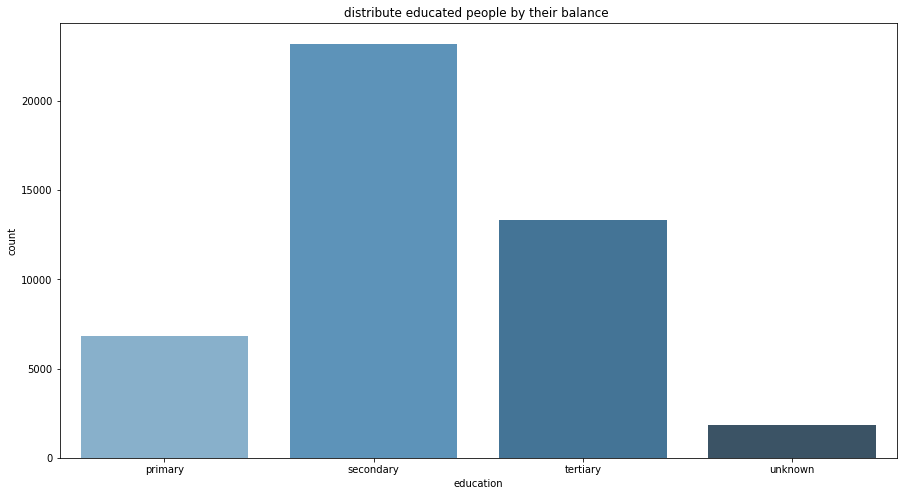

In [31]:
info_education=pd.pivot_table(df,index=['education'],values='balance',aggfunc='count')
info_education.columns=['count']
info_education.head()

f, ax = plt.subplots(figsize=(15, 8))
ax = sns.barplot(x=info_education.index, y="count", data=info_education, palette="Blues_d")
plt.title('distribute educated people by their balance ')

In [32]:
df['job'].unique()
job_balance_category=pd.crosstab(df['job'],df['balance_category'])
job_balance_category

balance_category,average balance,high balance,low balance
job,,,
admin.,190,24,4957
blue-collar,417,35,9280
entrepreneur,79,25,1383
housemaid,61,11,1168
management,738,134,8586
retired,167,33,2064
self-employed,110,17,1452
services,168,9,3977
student,60,4,874


In [33]:
df['marital'].unique()
age_marital=pd.crosstab(df['marital'],df['balance_category'])
age_marital

balance_category,average balance,high balance,low balance
marital,,,
divorced,228,35,4944
married,1577,230,25407
single,689,86,12015


In [34]:
df['education'].unique()
education_purpose=pd.crosstab(df['education'],df['purpose'])
education_purpose

purpose,can get a credit,can not get a credit
education,,
primary,591,6260
secondary,2450,20752
tertiary,1996,11305
unknown,252,1605


In [35]:
df['job'].unique()
job_poutcome=pd.crosstab(df['job'],df['poutcome'])
job_poutcome

poutcome,Under consideration,failure,other,success
job,,,,
admin.,4083,643,241,204
blue-collar,8115,1068,401,148
entrepreneur,1262,164,39,22
housemaid,1088,97,26,29
management,7634,1044,393,387
retired,1777,230,83,174
self-employed,1298,165,61,55
services,3448,444,177,85
student,653,117,81,87


In [36]:
df['poutcome'].unique()
poutcome_purpose=pd.crosstab(df['poutcome'],df['purpose'])
poutcome_purpose

purpose,can get a credit,can not get a credit
poutcome,,
Under consideration,3386,33573
failure,618,4283
other,307,1533
success,978,533


In [38]:
df_grouped_sum=df.groupby('marital',as_index=False)['age'].agg('sum').rename(columns={'age':'age_Sum'})
df_grouped_cnt=df.groupby('marital',as_index=False)['age'].agg('count').rename(columns={'age':'age_Count'})

df_grouped_average=df_grouped_sum.merge(df_grouped_cnt,left_on='marital',right_on='marital',how='inner')

df_grouped_average.loc[:,'Average of Age']=df_grouped_average['age_Sum']/df_grouped_average['age_Count']

df_grouped_average.sort_values('age_Sum',ascending=True)

,marital,age_Sum,age_Count,Average of Age
0,divorced,238392,5207,45.782984
2,single,431067,12790,33.703440
1,married,1181308,27214,43.408099


In [39]:
df_grouped_sum=df.groupby('housing',as_index=False)['balance'].agg('sum').rename(columns={'balance':'balance_Sum'})
df_grouped_cnt=df.groupby('housing',as_index=False)['balance'].agg('count').rename(columns={'balance':'balance_Count'})

df_grouped_average=df_grouped_sum.merge(df_grouped_cnt,left_on='housing',right_on='housing',how='inner')

df_grouped_average.loc[:,'Average of balance']=df_grouped_average['balance_Sum']/df_grouped_average['balance_Count']

df_grouped_average.sort_values('balance_Sum',ascending=False)

,housing,balance_Sum,balance_Count,Average of balance
0,no,32059342,20081,1596.501270
1,yes,29530340,25130,1175.103064


In [40]:
def number_of_job(df, job ,balance_category):
    number_list=df[(df['job']==job) & (df['balance_category']==balance_category)]
    number_list_count=number_list['education'].count()
    return number_list_count
number_of_job(df,'technician','high balance')

42

In [41]:
number_of_job(df,'blue-collar','low balance')

9280

In [42]:
number_of_job(df,'student','average balance')

60

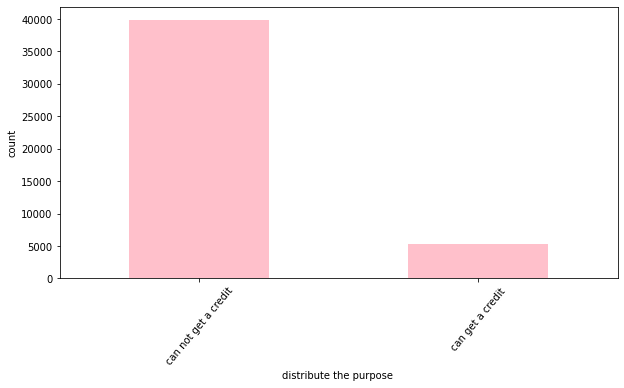

In [43]:
plt.rcParams['figure.figsize']=(10,5)
df['purpose'].value_counts().sort_values(ascending=False).plot.bar(color='pink')
plt.xlabel('distribute the purpose ')
plt.ylabel('count')
plt.xticks(rotation=50)
plt.show()

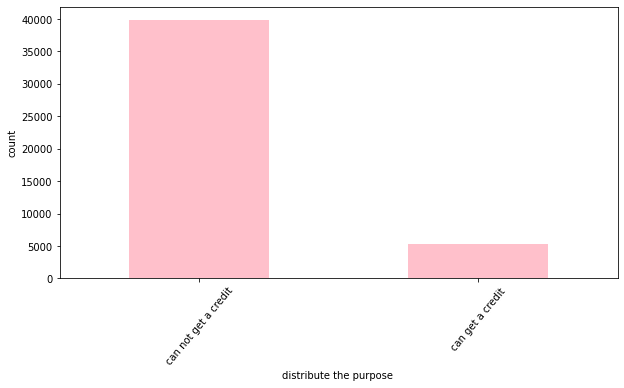

In [44]:
plt.rcParams['figure.figsize']=(10,5)
df['purpose'].value_counts().sort_values(ascending=False).plot.bar(color='pink')
plt.xlabel('distribute the purpose ')
plt.ylabel('count')
plt.xticks(rotation=50)
plt.show()

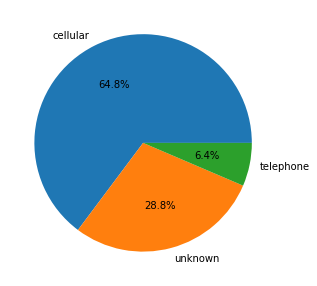

In [45]:
plt.rcParams['figure.figsize']=(18,5)
df['contact'].value_counts().sort_values(ascending=False).plot.pie(y='contact',autopct="%0.1f%%")
plt.axis('off')
plt.show()

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


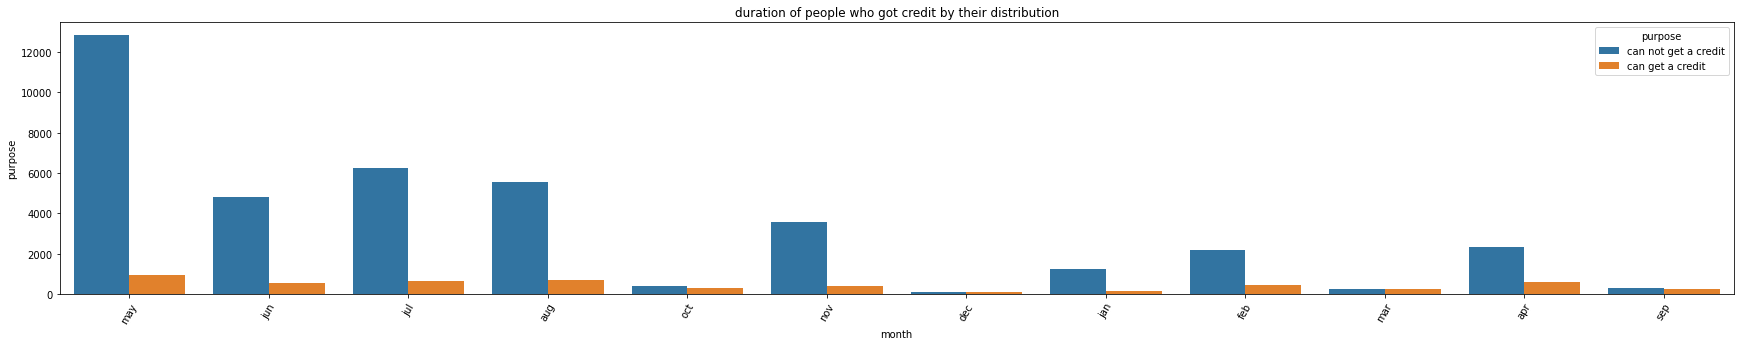

In [46]:
fig,ax=plt.subplots(figsize=(30,5))
sns.countplot(df['month'],hue=df['purpose'],ax=ax)
plt.title('duration of people who got credit by their distribution')
plt.xlabel('month')
plt.ylabel('purpose')
plt.xticks(rotation=60)
plt.show()

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


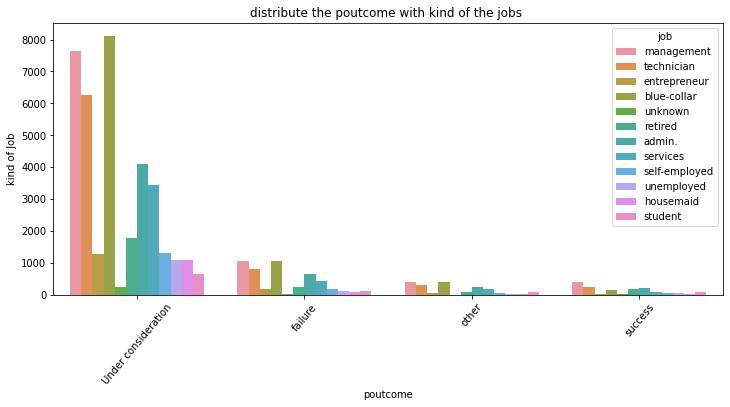

In [47]:
fig,ax=plt.subplots(figsize=(12,5))
sns.countplot(df['poutcome'],hue=df['job'],ax=ax)
plt.title('distribute the poutcome with kind of the jobs ')
plt.xlabel('poutcome')
plt.ylabel('kind of Job')
plt.xticks(rotation=50)
plt.show()

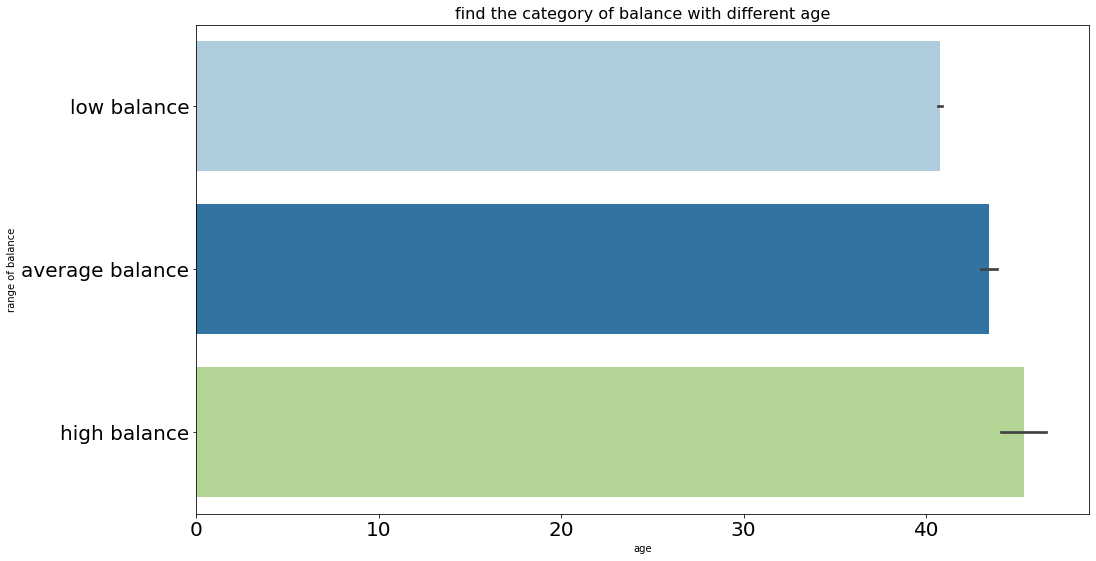

In [48]:
plt.figure(figsize=(16,9))
sns.set_palette(sns.color_palette("Paired"))
ax=sns.barplot(x='age',y='balance_category',data=df, orient='h')
ax.axes.set_title('find the category of balance with different age',fontsize=16)
ax.set_xlabel('age')
ax.set_ylabel('range of balance')
sns.color_palette("Set2")
ax.tick_params(labelsize=20)

<AxesSubplot:xlabel='balance_category', ylabel='balance'>

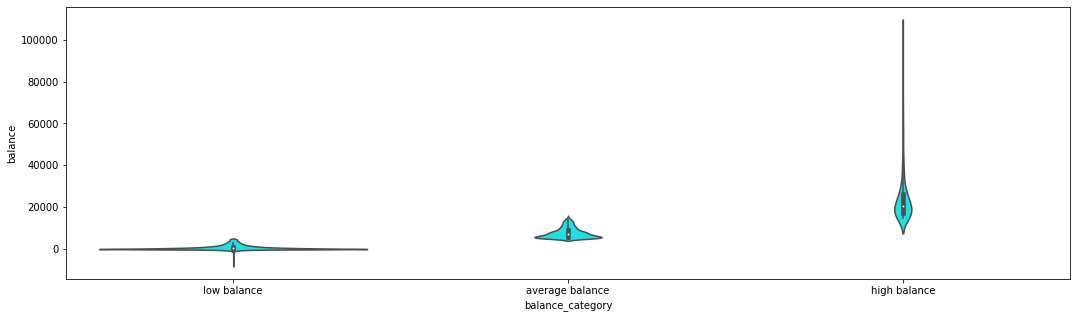

In [49]:
sns.violinplot(x='balance_category',y='balance',data=df, color='Aqua')

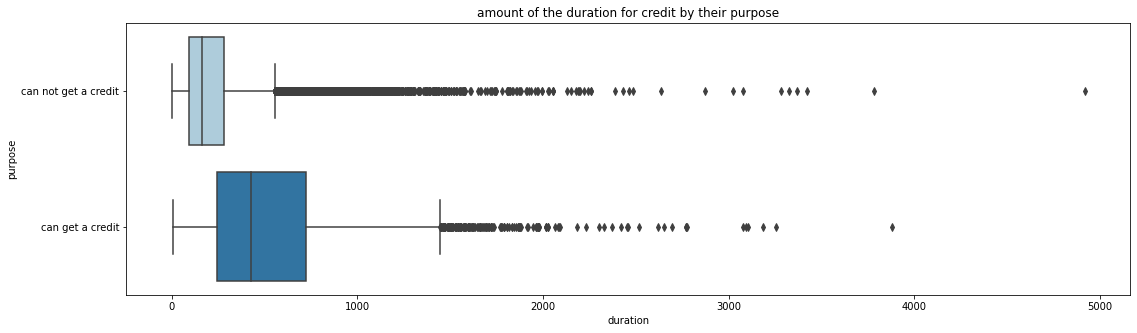

In [50]:
sns.boxplot(x='duration',y='purpose',data=df)
plt.title('amount of the duration for credit by their purpose')
plt.show()

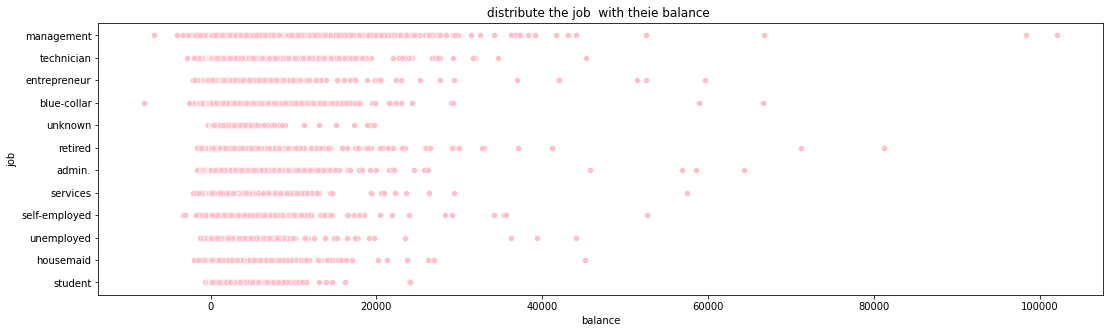

In [51]:
sns.scatterplot(x='balance',y='job',data=df, color='pink')
plt.title('distribute the job  with theie balance ')
plt.show()

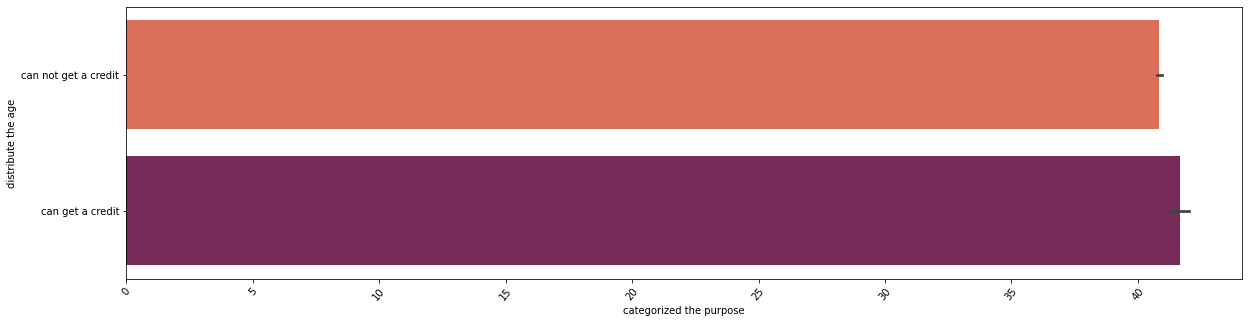

In [52]:
df.sort_values(by='purpose',ascending=False)

plt.figure(figsize=(20,5))

sns.barplot(x='age',y='purpose',data=df,palette="rocket_r")
plt.xlabel('categorized the purpose')
plt.ylabel('distribute the age')
plt.xticks(rotation=50)
plt.show()

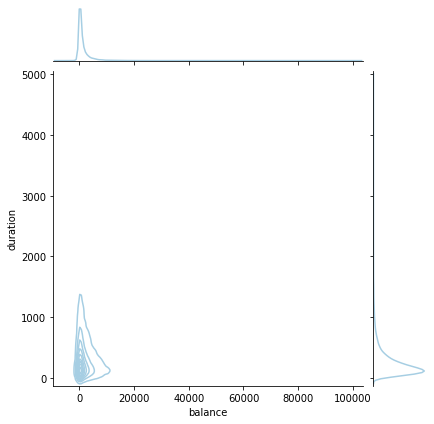

In [53]:
sns.jointplot(x='balance',y='duration',data=df, kind='kde')
plt.xlabel('balance')
plt.ylabel('duration')
plt.xticks(rotation=50)
plt.show()

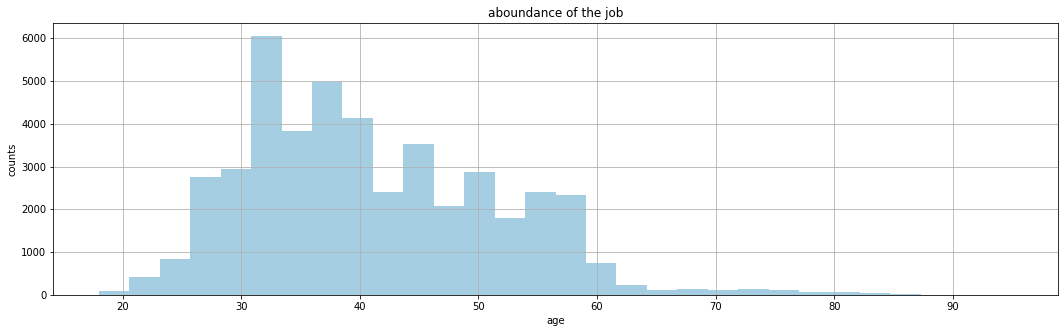

In [54]:
df['age'].hist(bins=30)
plt.xlabel('age')
plt.ylabel('counts')
plt.title('aboundance of the job')
plt.show()

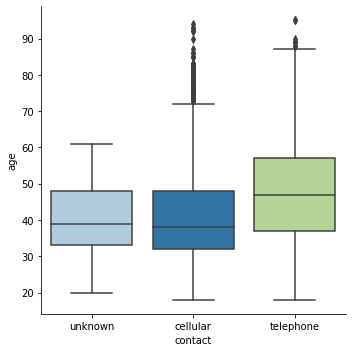

<Figure size 720x360 with 0 Axes>

In [55]:
sns.catplot(x='contact',y='age',data=df,kind='box')
plt.figure(figsize=(10,5))
plt.show()

([<matplotlib.patches.Wedge at 0x1658495e0>,
 [Text(1.05100201895621, 0.32464558544660804, 'admin.'),
  Text(1.0981743044318053, 2.356695397603543, 'blue-collar'),
  Text(-0.23455727990318287, 1.074701299173133, 'entrepreneur'),
  Text(-0.9750214856182489, 2.1930191751516412, 'housemaid'),
  Text(-2.052304448115499, 0.4450241029936898, 'management'),
  Text(-0.712295175770597, -0.8382336085924583, 'retired'),
  Text(-0.3694050205509202, -1.0361177205278242, 'self-employed'),
  Text(0.0024396501890563533, -1.5999981400323424, 'services'),
  Text(0.30315573161282905, -1.0574008711885434, 'student'),
  Text(1.9204305231399972, -1.7526969520690783, 'technician'),
  Text(1.0871141104361852, -0.1678776664435805, 'unemployed'),
  Text(2.399186546216199, -0.0624813288525945, 'unknown')],
 [Text(0.5732738285215689, 0.17707941024360435, '9.5%'),
  Text(0.8869869381949197, 1.9034847442182463, '17.0%'),
  Text(-0.1279403344926452, 0.5862007086398907, '3.7%'),
  Text(-0.7718920094477802, 1.73614018

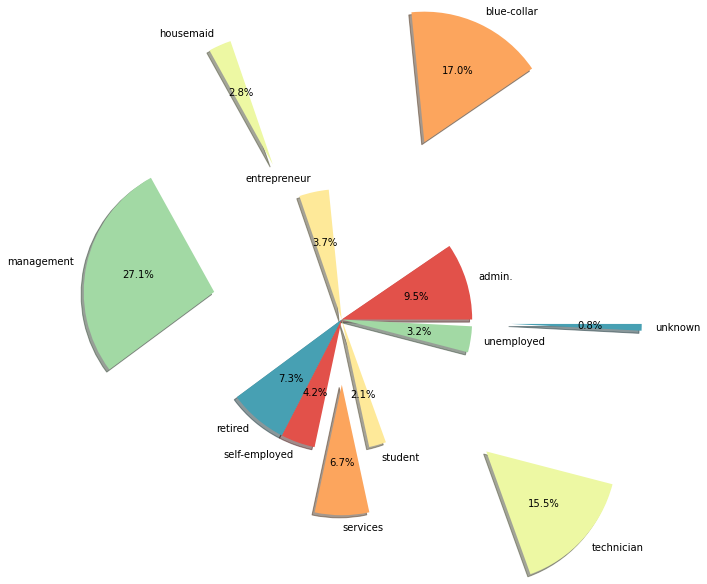

In [56]:
pm=df[['balance','job']].groupby(['job']).agg([sum])
sns.set_palette('Spectral')
plt.figure(figsize=(10,6))
plt.pie(pm['balance']['sum'], labels = pm.index, explode = (0, 1.5, 0, 1.3, 1, 0, 0, 0.5, 0, 1.5, 0, 1.3), 
        shadow = True, autopct = '%1.1f%%')

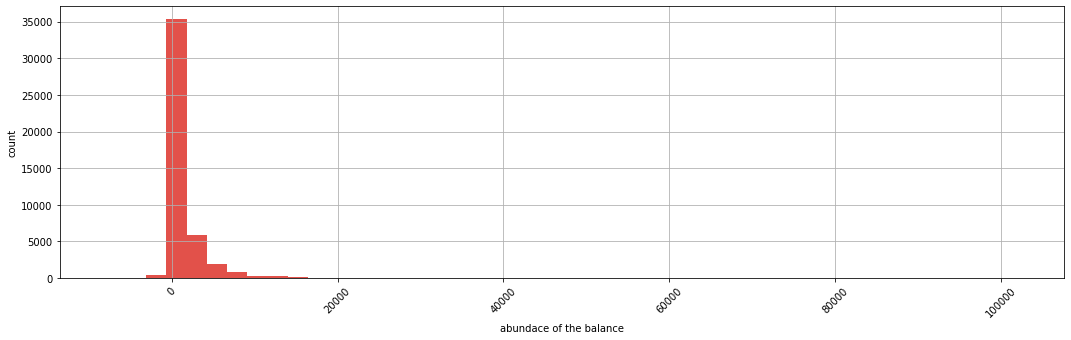

In [57]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
df['balance'].hist(bins=45)
plt.xlabel('abundace of the balance')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

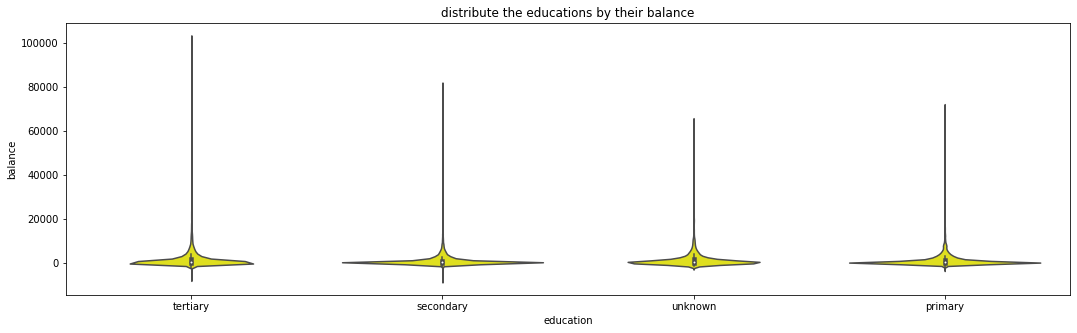

In [58]:
sns.violinplot(x='education',y='balance',data=df, color='yellow')
plt.title('distribute the educations by their balance')
plt.show()

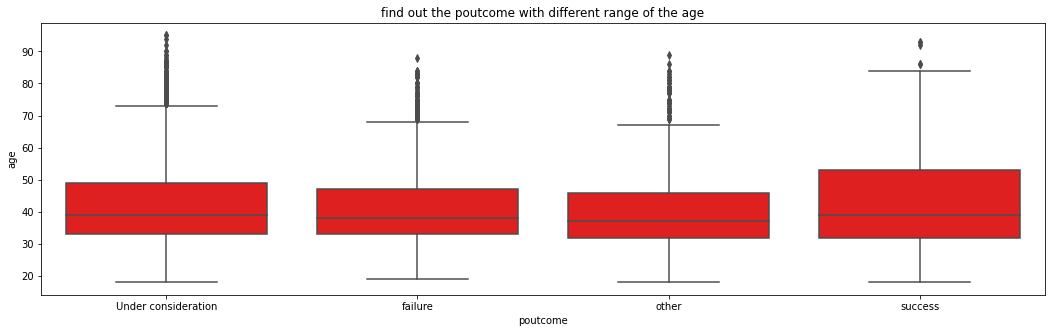

In [59]:
sns.boxplot(x='poutcome',y='age',data=df, color='red')
plt.title('find out the poutcome with different range of the age')
plt.show()

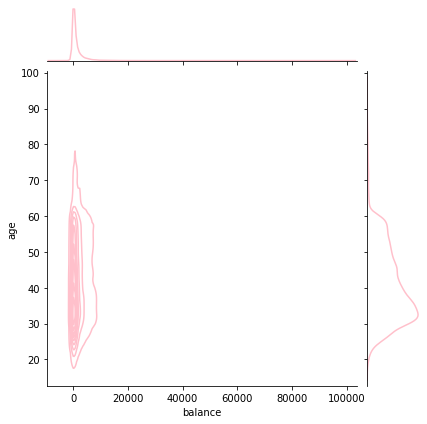

In [60]:
sns.jointplot(x='balance',y='age',data=df, kind='kde',color='pink')
plt.xlabel('range of balance')
plt.ylabel('range of the age')
plt.xticks(rotation=50)
plt.show()

In [61]:
from sklearn.preprocessing import scale
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier 
from sklearn.svm import SVC 
from sklearn.neural_network import MLPClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn import preprocessing 
from sklearn import metrics 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
le=preprocessing.LabelEncoder()
df.job=le.fit_transform(df.job)
df.marital=le.fit_transform(df.marital)
df.education=le.fit_transform(df.education)
df.housing=le.fit_transform(df.housing)
df.loan=le.fit_transform(df.loan)
df.contact=le.fit_transform(df.contact)
df.month=le.fit_transform(df.month)
df.poutcome=le.fit_transform(df.poutcome)
df.balance_category=le.fit_transform(df.balance_category)
df.purpose=le.fit_transform(df.purpose)
df.head(5)

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,poutcome,balance_category,purpose
0,58,4,1,2,2143,1,0,2,5,8,261,1,0,2,1
1,44,9,2,1,29,1,0,2,5,8,151,1,0,2,1
2,33,2,1,1,2,1,1,2,5,8,76,1,0,2,1
3,47,1,1,3,1506,1,0,2,5,8,92,1,0,2,1
4,33,11,2,3,1,0,1,2,5,8,198,1,0,2,1


In [63]:
x=df.drop(['loan','contact','day','month','duration'],axis=1)
y=df['purpose'].values
x.head(5)

,age,job,marital,education,balance,housing,campaign,poutcome,balance_category,purpose
0,58,4,1,2,2143,1,1,0,2,1
1,44,9,2,1,29,1,1,0,2,1
2,33,2,1,1,2,1,1,0,2,1
3,47,1,1,3,1506,1,1,0,2,1
4,33,11,2,3,1,0,1,0,2,1


In [64]:
x_train, x_test, y_train, y_test=train_test_split( x, y , test_size=.30, random_state=1234, stratify= y)
knn= KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
print (knn.score(x_test, y_test))

0.8801975818342672


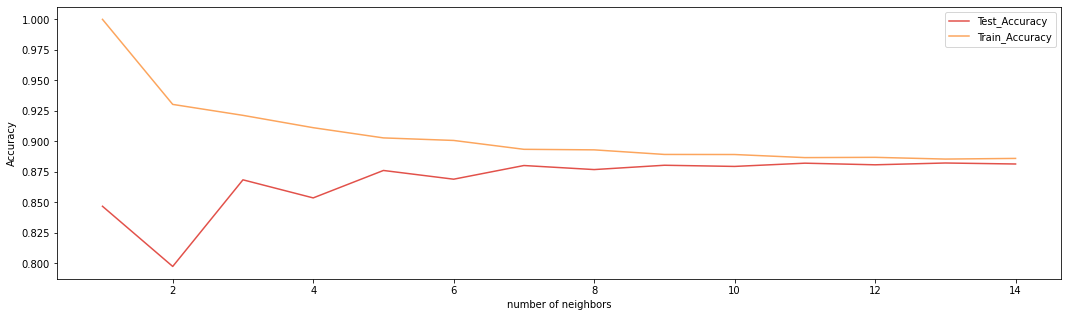

(31647, 10) (31647,) (13564, 10) (13564,)


In [65]:
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i , k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(x_train, y_train)
    
    
    
    
    train_accuracy[i] = knn.score(x_train, y_train)
        
    test_accuracy[i]=knn.score(x_test, y_test)
    
    
plt.plot(neighbors , test_accuracy , label='Test_Accuracy')
plt.plot(neighbors, train_accuracy , label='Train_Accuracy')
plt.legend()
plt.xlabel('number of neighbors')
plt.ylabel('Accuracy')
plt.show()
    

print(x_train.shape, y_train.shape, x_test.shape , y_test.shape)

In [66]:
models=[]
models.append(('LR',LogisticRegression(random_state=12345)))
models.append(('DT',DecisionTreeClassifier(random_state=12345)))
models.append(('RF',RandomForestClassifier(random_state=12345)))
models.append(('NN',MLPClassifier(random_state=12345)))
models.append(('svm',SVC(random_state=12345)))
models.append(('KN', KNeighborsClassifier()))



result=[]
name=[]
for name, model in models:
    model.fit(x_train,y_train)
    predictions=model.predict(x_test)
    accuracy=accuracy_score(y_test, predictions)
    msg = "%s: (%f)" % (name, accuracy)
    print(msg)

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR: (1.000000)
DT: (1.000000)
RF: (1.000000)
NN: (0.997346)
svm: (0.882999)
KN: (0.876143)
